In [6]:
import numpy as np
import DiscreteSignal as ds
import matplotlib.pyplot as plt
import os
INF = 5

In [7]:
class LtiDiscrete:
    """Initializes the system with the system impulse response"""
    def __init__(self, impulse_response=None):
        self.impulse_response = impulse_response
        
    """Decomposes the input_signal and returns the unit impulse and their coefficients"""
    def linear_combination_of_impulses(self, input_signal):
        
        unit_impulses = []
        coefficients = []
        
        for i, value in enumerate(input_signal.values):
            unit_impulse = ds.DiscreteSignal(INF=(input_signal.INF), start_impulse=(i-input_signal.INF))
            unit_impulse.set_value_at_time(i-input_signal.INF, 1.0)
            unit_impulses.append(unit_impulse)
            coefficients.append(value)
        return unit_impulses,np.array(coefficients)
    
    """Finds the output of a signal inserted in a Linear Time Invariance system"""
    def output(self, input_signal):
        unit_impulses, coefficients = self.linear_combination_of_impulses(input_signal)
        
        impulse_responses = []
        output_signal = ds.DiscreteSignal(INF=(input_signal.INF))
        
        
        for unit_impulse,value in zip(unit_impulses,coefficients):
            
            shifted_impulse_response = self.impulse_response.shift_signal(unit_impulse.start_impulse)
            impulse_responses.append(shifted_impulse_response)
            scaled_impulse = shifted_impulse_response.multiply_const_factor(value)
            output_signal = output_signal.add(scaled_impulse)
            
        return output_signal,impulse_responses,coefficients
        

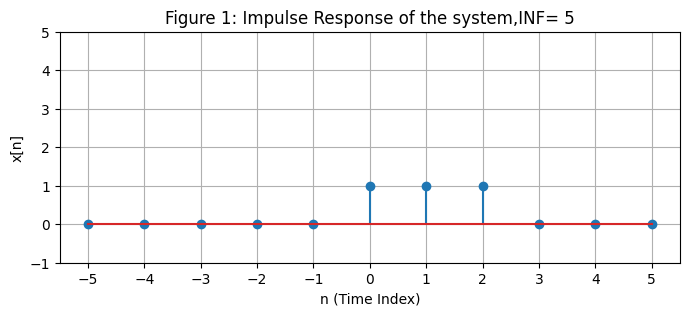

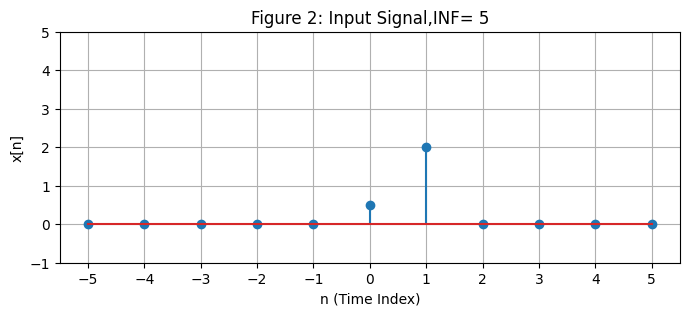

Figure saved as: E:\Academy\CSE-220-Signals Sessional\Offlines\Offline-1\Offline-1\Discrete_Plots\Impulses.png
Figure saved as: E:\Academy\CSE-220-Signals Sessional\Offlines\Offline-1\Offline-1\Discrete_Plots\Impulse_Response.png


In [9]:
def plot_impulses(unit_impulses, sum_of_unit_impulses,suptitle,which_impulse,plot_name="Impulses"):
    num_responses = len(unit_impulses)
    rows = (num_responses + 3) // 3  # Calculate number of rows needed
    cols = 3  # Number of columns
    
    fig, axs = plt.subplots(rows, cols , figsize=(cols*3, rows*3))
    axs = axs.flatten()
    
    # Plot the individual impulse responses
    for i, impulse in enumerate(unit_impulses):
        if which_impulse == "input impulse":
            impulse.plot_ax(ax=axs[i], title=fr'$\delta[n  -  ({i-impulse.INF})] \times[{i - impulse.INF}]$',y_range=(-1,3))
        else :
            impulse.plot_ax(ax=axs[i], title=fr'$h[n - ({i-impulse.INF})] \ast \times[{i - impulse.INF}]$',y_range=(-1,3))
        
    # Plot the sum of the impulse responses
    sum_of_unit_impulses.plot_ax(ax=axs[-1], title="Sum",y_range=(-1,3))
    
    plt.tight_layout()
    
    # Add overall title
    fig.suptitle(suptitle, fontsize=14)
    plt.subplots_adjust(top=.9)

    # plt.show()
    # Get the current working directory
    current_dir = os.getcwd()

    # Create the 'plot' directory in the current working directory
    plot_dir = os.path.join(current_dir, "Discrete_Plots")
    os.makedirs(plot_dir, exist_ok=True)

    # Save the figure in the ./plot directory
    fig_path = os.path.join(plot_dir, f"{plot_name}.png")
    plt.savefig(fig_path)
    print(f"Figure saved as: {fig_path}")
    
    # Close the plot to free up memory
    plt.close()
    
def show_linear(lti,input_signal):
    # decompose the input signal into unit impulses
    shifted_unit_impulses, coefficients = lti.linear_combination_of_impulses(input_signal)
    
    # finding the impulse responses of the system by scaling the shifted_unit_impulses response with the coefficients
    unit_impulses = []
    sum_of_unit_impulses = ds.DiscreteSignal(INF)
    for shifted_unit_impulse, coefficient in zip(shifted_unit_impulses, coefficients):
        scaled_impulse_response = shifted_unit_impulse.multiply_const_factor(coefficient)
        unit_impulses.append(scaled_impulse_response)
        sum_of_unit_impulses = sum_of_unit_impulses.add(scaled_impulse_response)
    
    # plot the impulse responses and the sum of the impulse responses
    plot_impulses(unit_impulses, sum_of_unit_impulses,suptitle="Impulses multiplied by coefficients",which_impulse="input impulse",plot_name="Impulses")
    
def show_output(lti,input_signal):
    # find the output of the system
    output,shifted_impulse_responses,coefficients = lti.output(input_signal)    
   # finding the impulse responses of the system by scaling the shifted__impulses_response with the coefficients
    impulse_responses = []
   
    for shifted_impulse_response, coefficient in zip(shifted_impulse_responses, coefficients):
       scaled_impulse_response = shifted_impulse_response.multiply_const_factor(coefficient)
       impulse_responses.append(scaled_impulse_response)
       
    # plot the output and the impulse responses
    plot_impulses(impulse_responses, output,suptitle="Response of Input Signal",which_impulse="impulse response",plot_name="Impulse_Response")
    
    
def main():
    #impluse response of the system
    impulse_response = ds.DiscreteSignal(INF)
    impulse_response.set_value_at_time(0,1)
    impulse_response.set_value_at_time(1,1)
    impulse_response.set_value_at_time(2,1)
    impulse_response.plot(title=f"Figure 1: Impulse Response of the system,INF= {impulse_response.INF}")
    
    # input signal to the system
    input_signal = ds.DiscreteSignal(INF)
    input_signal.set_value_at_time(0,.5)
    input_signal.set_value_at_time(1,2)
    input_signal.plot(title=f"Figure 2: Input Signal,INF= {input_signal.INF}")

    # create an instance of the LtiDiscrete class
    lti = LtiDiscrete(impulse_response)
    
    # shows the decomposition of the input signal into unit impulses and the sum of the impulse responses
    show_linear(lti,input_signal)
    # shows the output and the impulse responses of the system
    show_output(lti,input_signal)

if __name__ == "__main__":
    main()